In [1]:
#load all packages before beginning
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from scipy.sparse import *
from scipy import *
from scipy.sparse.linalg import lsqr
from numpy.linalg import solve, norm
import seaborn as sns #for ploting density dist.
import rank
%matplotlib inline
np.random.seed(1)

# Set printing width of pandas
pd.set_option('max_columns', 150)

Freshwater Food Webs from Brazil
==========

In [7]:
#Unicode error : https://stackoverflow.com/questions/1347791/unicode-error-unicodeescape-codec-cant-decode-bytes-cannot-open-text-file

Data = pd.read_csv(r'C:\Users\Phuc\Documents\MACALESTER\SENIOR\Fall\Indep study\data\foodweb\Brazil\WEB255.csv')

In [8]:
Data.head()

,"Angelini, R., Morais, R.J., Cattella, A.C., Resende, E.K., and Libralato, S. (2013). Aquatic food webs of the oxbow lakes in the Pantanal: A new site for fisheries guaranteed by alternated control?. Ecological Modelling, 253, pp. 82-96.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,Pantanal Plain - Braco Morto Acima (MAC model)...,Mammals,Caymans,Birds,Zooplankton,Aquatic insects,Terrestrial insects,S. borellii,S. robustum,T. argenteus,C. australis,P. reticulatum,H. orthonops,Hypostomus spp,P. curviventris,P. corruscans,Moenkhausia spp,Loricaria spp,P. squamoralevis,A. nuchalis,Leporinus spp,P. ternetzi,A. pantaneiro,H. platyrhynchus,T. paraguayensis,H. malabaricus,Serrasalmus spp,G. balzanii,Pimelodus spp,Loricariichthys spp,Roeboides spp,Steindachenerina spp,C. dorsalis,Triportheus spp,Pimelodella spp,Astyanax sp
1,Phytoplankton,0,0,0,0.4,0,0,0,0,0,0.04,0,0.26,0,0,0,0.003,0,0,0,0.001,0,0,0,0.065,0,0,0.014,0,0,0,0.092,0,0.039,0.065,0.052
2,Macrophytes,0,0,0,0,0.2,0.3,0.5,0,0.03,0,0,0.7,0,0,0,0.00058,0,0,0,0.068,0,0,0,0,0,0.02,0,0,0,0.076,0,0.025,0,0.022,0.057
3,Mammals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Caymans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#https://stackoverflow.com/questions/20868394/changing-a-specific-column-name-in-pandas-dataframe
Data = Data.rename(columns = {list(Data)[0]:'key'})

In [32]:
col_names = pd.DataFrame(Data.values[0,:])
col_names.columns = ['key']
col_names

,key
0,Pantanal Plain - Braco Morto Acima (MAC model)...
1,Mammals
2,Caymans
3,Birds
4,Zooplankton
5,Aquatic insects
6,Terrestrial insects
7,S. borellii
8,S. robustum
9,T. argenteus


In [12]:
# reorder rows and columns
ordered_data = pd.merge(col_names, Data, how='outer', on=['key'])
# ordered_data

In [13]:
for col in ordered_data['key'][36:]:
    ordered_data[col] = pd.Series(np.zeros(40), index=ordered_data.index)

In [7]:
# ordered_data

In [26]:
adj_matrix = ordered_data.values[1:, 1:].astype(np.float).T

In [9]:
# ordered_data

In [27]:
out = rank.spring_rank(adj_matrix)
scores = out[0]
Sigma = out[1]

In [28]:
inds = np.argsort(scores)
inds

array([35, 36, 38, 37,  3,  4,  5, 11,  6, 31, 30, 13, 28, 17, 16, 19,  7,
       15, 12, 23, 27, 26,  9, 34, 32, 33,  8, 18, 29, 25, 24, 14, 21, 10,
       22, 20,  2,  1,  0], dtype=int64)

In [29]:
ordered_Sigma = Sigma[inds,:]
ordered_Sigma = ordered_Sigma[:, inds]

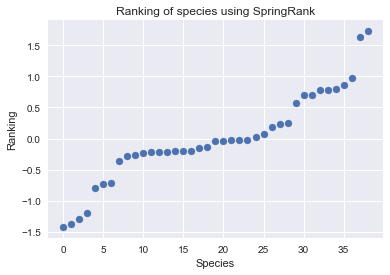

In [30]:
plt.scatter(range(39), scores[inds]);
plt.title('Ranking of species using SpringRank')
plt.xlabel('Species')
plt.ylabel('Ranking')
plt.show()

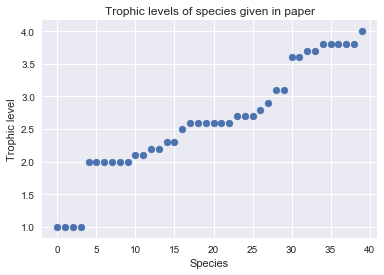

In [19]:
trophic_levels = np.array([1,1,1,2,2,2,2,3.1,2,2.3,2.2,2.1,2.1,2.7,2,2.7,2.5,2.6,2.6,2.6,2.6,2.3,2.7,3.1,2.8,3.6,3.8,3.7,4,3.8,3.8,3.8,3.6,3.8,2.6,2.2,2.9,3.7,2.6,1])
trophic_levels = np.sort(trophic_levels)
plt.scatter(range(trophic_levels.size), trophic_levels);
plt.title('Trophic levels of species given in paper')
plt.xlabel('Species')
plt.ylabel('Trophic level')
plt.show()

In [36]:
ordered_data['key'][inds]

35                                          Astyanax sp
36                                        Phytoplankton
38                                             Detritus
37                                          Macrophytes
3                                                 Birds
4                                           Zooplankton
5                                       Aquatic insects
11                                       P. reticulatum
6                                   Terrestrial insects
31                                 Steindachenerina spp
30                                        Roeboides spp
13                                       Hypostomus spp
28                                        Pimelodus spp
17                                        Loricaria spp
16                                      Moenkhausia spp
19                                          A. nuchalis
7                                           S. borellii
15                                        P. cor

Looks somewhat similar to the rankings predicted with SpringRank in terms of
shift in levels, though the rankings within are a lil different.